# Tutorial: Introduction to Open Quantum Systems

In this tutorial, you will learn:
- what an open quantum system is
- how the dynamics of open quantum can be modeled
- what a Lindblad master equation is and
- how it can be simulated using `dynamiqs`

In [1]:
import dynamiqs as dq
import jax.numpy as jnp

## Closed vs Open Quantum Systems

The state of a **closed quantum system** can be fully described by the quantum state-vector $\lvert \psi \rangle \in \mathcal{H}$, where $\mathcal{H}$ is the Hilbert space of the closed system. The size of the Hilberts space depends on the specific system under consideration.
For a Hamiltonian $\hat{H}$, the evolution of the quantum system is given by the Schrödinger equation (in natural units, i.e. $\hbar = 1$):
$$\frac{\mathrm{d} \lvert \psi \rangle}{\mathrm{d}t} = -i \hat{H}\lvert \psi \rangle$$

**Open quantum systems** can no longer be described by a single *pure* state $\lvert \psi \rangle$ alone. In general, an open quantum system is defined as a quantum system A that is in some way or the other coupled to another system B (e.g. a bath), but we are only interested in the (effective) description of the system A under consideration.
While system A and B will in general be entangled with each other, tracing out the degrees of freedom of system B, will result in the fact that system A can no longer be described by a single pure state $\lvert \psi \rangle$ alone.

Instead the state of an open quantum system is described by a so-called **density matrix** $\hat{\rho}$ which is itself a quantum operator. In diagonal form, the density matrix can be written as
$$\hat{\rho} = \sum_i p_i \lvert \psi_i \rangle \langle \psi_i \rvert$$
$\{\lvert \psi_i​\rangle \}$ are the eigenstates (orthonormal basis).

$\{p_i\}$ are the corresponding eigenvalues, which satisfy $0\leq p_i\leq1$ and $\sum_i p_i = 1$.

**Interpretation of the Coefficients $p_i$:**

- Each $p_i$​ can be interpreted as the probability of finding the system in the pure state ​$\lvert \psi_i​\rangle$.
- If the system is in a pure state, then one eigenvalue is 1 and the rest are 0 (e.g., $\hat{\rho}=\lvert \psi \rangle \langle \psi \rvert$).
- If the system is in a mixed state, multiple $p_i$​ are nonzero, meaning the system is in a statistical mixture of the eigenstates.

## Open quantum system dynamiqs

In general, obtaining the equations of motion of system A for an aribtrary coupled system between A and B is not easy. However, under some reasonable assumptions, we can obtain a simple equation that governs the dynamics of the system A.

**The Lindblad master equation**

In some scenarios, there is an easy way of describing the evolution of an open quantum systems. Some key assumptions are:
- Born approximation. The interaction between the system and the environment is weak, meaning the system's evolution is only slightly perturbed by the environment.
- Markov approximation. The environment has a very short correlation time compared to the system's evolution. With other words, the system does not "remember" past interactions with the environment, meaning the evolution is local in time.

Under these (among others) assumptions, the time-evolution of the density matrix can be described by the so-called **Lindblad master equation**:
$$\frac{\mathrm{d} \hat{\rho}}{\mathrm{d}t} = \mathcal{L}\hat{\rho} \equiv -i [\hat{H}, \hat{\rho}] + \sum_i\mathcal{D}[\hat{L}_i](\hat{\rho})$$

Here, $[\hat{A}, \hat{B}] = \hat{A}\hat{B} - \hat{B}\hat{A}$ is the *commutator* and $\mathcal{D}[\hat{L}_i](\hat{\rho})$ is called the **dissipator**, with *jump operator* $\hat{L}_i$. It is defined by:
$$\mathcal{D}[\hat{L}_i](\hat{\rho}) = \gamma_i \left[\hat{L}_i\hat{\rho}\hat{L}_i^\dagger -\frac{1}{2}\left( \hat{L}_i^\dagger \hat{L}_i \hat{\rho}  +  \hat{\rho}\hat{L}_i^\dagger \hat{L}_i\right) \right]$$

Here, $\gamma_i \geq 0$ is a dissipation rate, corresponding to the jump operator $\hat{L}_i$. Sometimes, it is absorbed into the jump operator, i.e. $\tilde{L}_i = \sqrt{\gamma_i}\hat{L}_i$.

The Lindblad master equation is a linear equation in $\hat{\rho}$ and thus can be represented by the **superoperator** $\mathcal{L}$, called *Liouvillian* or *Lindbladian*. As such, the superoperator $\mathcal{L}$ contains all information about the coherent and incoherent dynamics of the system, and its eigenvalues and eigenmatrices give valuable information about the system's properties.

### Simulation of open quantum systems in `dynamiqs`

In `dynamiqs`, it is quite easy to simulate the time-evolution of a density matrix. For a detailed introduction of how to use `dynamiqs` see [this tutorial](Tutorial_Dynamiqs.ipynb).

For example, let's consider a bosonic mode $\hat{a}$ that is subject to two sources of errors: dephasing and single photon loss.
- Single photon loss: This is modeled by the dissipator $\mathcal{D}[\hat{a}](\hat{\rho})$ with single photon loss rate $\kappa$. Intuitively, this can be interpreted as the system loosing single photons at a rate associated with $\kappa$.
- Dephasing: This is modeled by the dissipator $\mathcal{D}[\hat{a}^\dagger\hat{a}](\hat{\rho})$ with single photon loss rate $\kappa_\varphi$. This can be interpreted as the system getting a kick in energy (phase) at a rate associated with $\kappa_\varphi$.

Let the Hamiltonian of the system be
$$\hat{H} = \omega \hat{a}^\dagger \hat{a}$$

Let us explore the dynamics of a coherent state $\lvert \alpha \rangle$ under this dissipative dynamics.

|██████████| 100.0% ◆ elapsed 25.29ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:01<00:00, 27.50it/s]


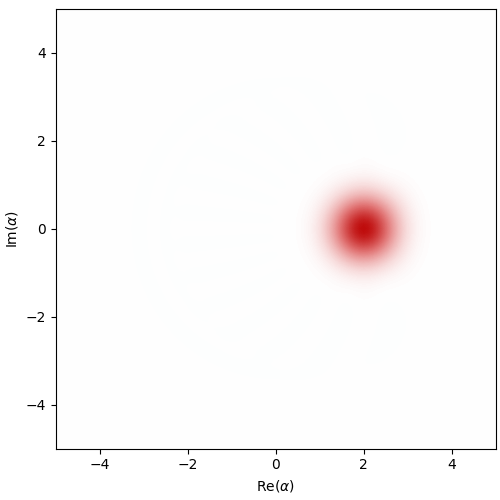

In [6]:
omega  = 1.0
kappa_phi = 0.1 # dephasing rate
kappa = 0.2 # single-photon loss rate
na = 15 # Hilbert space truncation

psi0 = dq.coherent(na, 2.0) # initial state

a = dq.destroy(na)

tsave = jnp.linspace(0, 20, 400)

res = dq.mesolve(omega*a.dag()@a, [jnp.sqrt(kappa_phi)*a.dag()@a, jnp.sqrt(kappa)*a], psi0, tsave)

dq.plot.wigner_gif(res.states)

We see that the system relaxes to its steady state (the vacuum).

### Resources

For more resources on open quantum system check out these links:
- The Theory of Open Quantum Systems (The BIBLE of open quantum ystems). Heinz-Peter Breuer, Francesco Petruccione. Oxford University Press (2002).
- [A short introduction to the Lindblad Master Equation](https://arxiv.org/abs/1906.04478)
- [Open Quantum Systems. An Introduction](https://arxiv.org/abs/1104.5242)
- [Quantum trajectories and open many-body quantum systems. Adv. Phys. 63, 77 (2014)](https://arxiv.org/abs/1405.6694)